#   Inferencial analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

## Import des données

In [6]:
immo_df = pd.read_csv("immo_1i.csv")
immo_df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3


## Premiére observation

In [7]:
immo= immo_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

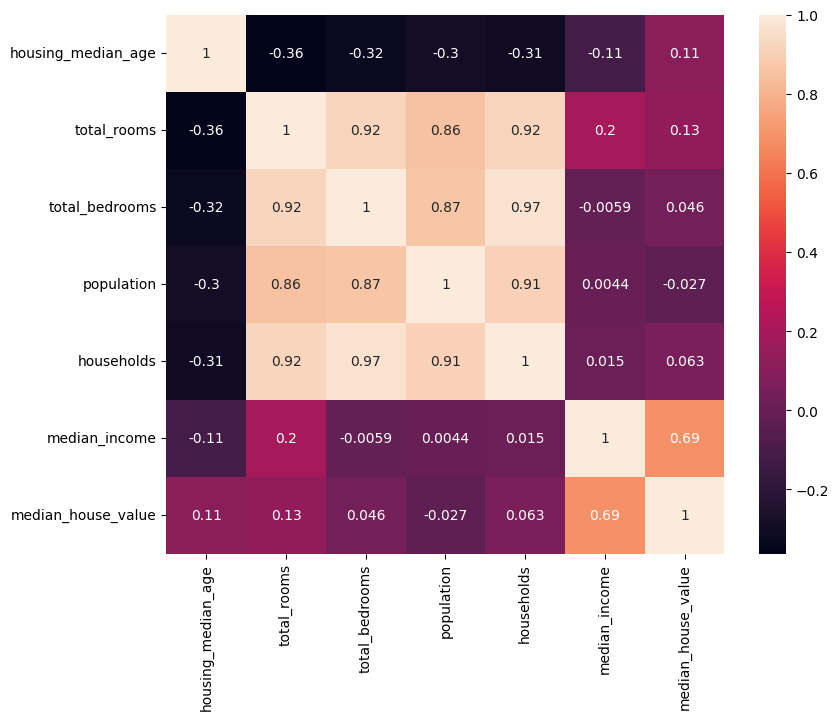

In [8]:
plt.figure(figsize=(9,7))
corr_matrix = immo.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Heatmap nous montre une correlation possible entre total_bedrooms/households(0.98), total_bedrooms/total_rooms (0.93),  total_rooms/households(0.92), population/households (0.91), total_bedrooms/population (0.88) et enfin population/total_rooms (0.86) et median_income/median_house_value (0.69). 

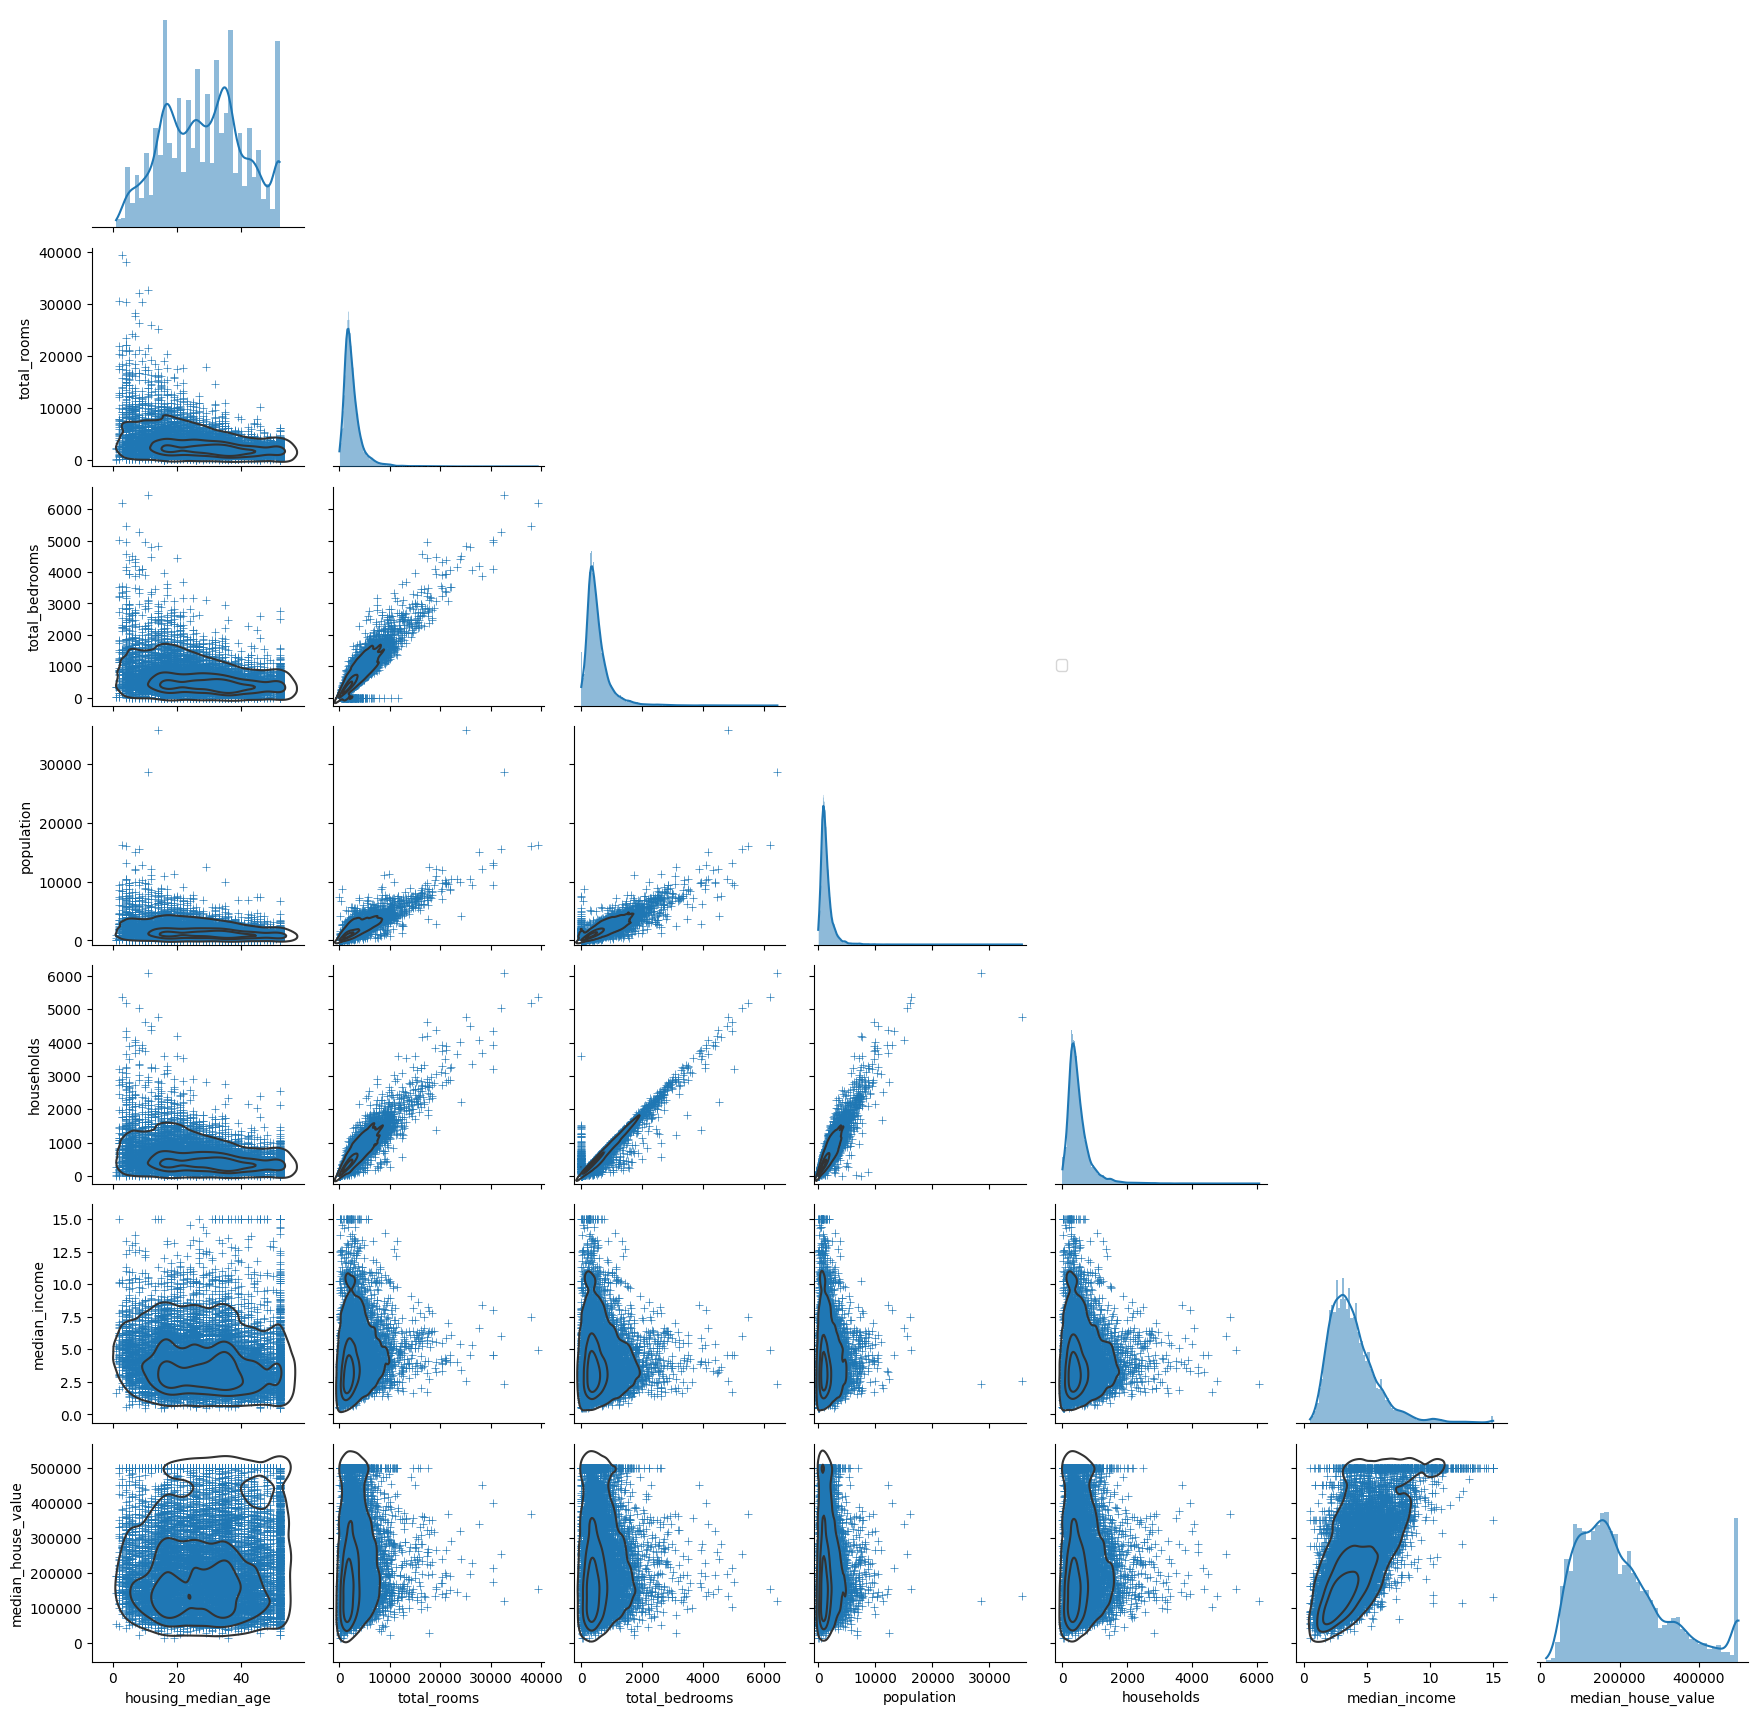

In [9]:
g = sns.PairGrid(data = immo, corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

Confirme ce que l'on a pu observé 

In [10]:
X= immo.copy()

In [11]:
y=immo_df[['localisation']]

In [12]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [13]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           localisation   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     597.1
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:24:09   Log-Likelihood:                -21100.
No. Observations:               16512   AIC:                         4.222e+04
Df Residuals:                   16504   BIC:                         4.228e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9138      0.028    137.910      0.000       3.858       3.969
housing_median_age    -0.0108      0.001    -18.034      0.000      -0.012      -0.010
total_rooms            0.0001   1.01e-05     13.315      0.000       0.000       0.000
total_bedrooms       1.93e-05    6.8e-05      0.284      0.777      -0.000       0.000
population         -2.028e-05   1.47e-05     -1.382      0.167   -4.91e-05    8.49e-06
households            -0.0007   8.33e-05     -8.959      0.000      -0.001      -0.001
median_income          0.0420      0.006      7.026      0.000       0.030       0.054
median_house_value -3.792e-06   8.91e-08    -42.567      0.000   -3.97e-06   -3.62e-06
==============================================================================
Omnibus:                     2284.155   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3341.473
Skew:                          -1.068   Prob(JB):                         0.00
Kurtosis:                       3.542   Cond. No.                     9.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
ols.params 

const                 3.913761
housing_median_age   -0.010841
total_rooms           0.000135
total_bedrooms        0.000019
population           -0.000020
households           -0.000746
median_income         0.041965
median_house_value   -0.000004
dtype: float64

In [15]:
pd.set_option('display.float_format', '{:.4f}'.format)
coefs_with_p_value = ols.pvalues.to_frame(name='p-values').iloc[1:]
coefs_with_p_value

,p-values
housing_median_age,0.0000
total_rooms,0.0000
total_bedrooms,0.7765
population,0.1671
households,0.0000
median_income,0.0000
median_house_value,0.0000


## 2 eme iteration observation